In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Defining the list
vinceCarter = {"Year":pd.Series([1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
                                  2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]),
               "Team":pd.Series(["Raptors","Raptors","Raptors","Raptors","Raptors","Raptors",
                                 "Raptors","Nets","Nets","Nets","Nets","Magic","Suns","Mavericks",
                                 "Mavericks","Mavericks","Grizzlies","Grizzlies","Grizzlies","Kings","Hawks","Hawks"]),
               "Games":pd.Series([50,82,75,60,43,73,77,79,82,76,80,70,73,31,81,81,66,60,73,58,76,60]),
               "Points":pd.Series([913,2107,2070,1484,884,1645,1886,1911,2070,1622,1622,1244,1022,615,
                                   1088,967,384,395,586,313,562,398])
               }

# Framing the Dataset
vinceCarter_list = pd.DataFrame(vinceCarter)
vinceCarter_list

,Year,Team,Games,Points
0,1998,Raptors,50,913
1,1999,Raptors,82,2107
2,2000,Raptors,75,2070
3,2001,Raptors,60,1484
4,2002,Raptors,43,884
5,2003,Raptors,73,1645
6,2004,Raptors,77,1886
7,2005,Nets,79,1911
8,2006,Nets,82,2070
9,2007,Nets,76,1622


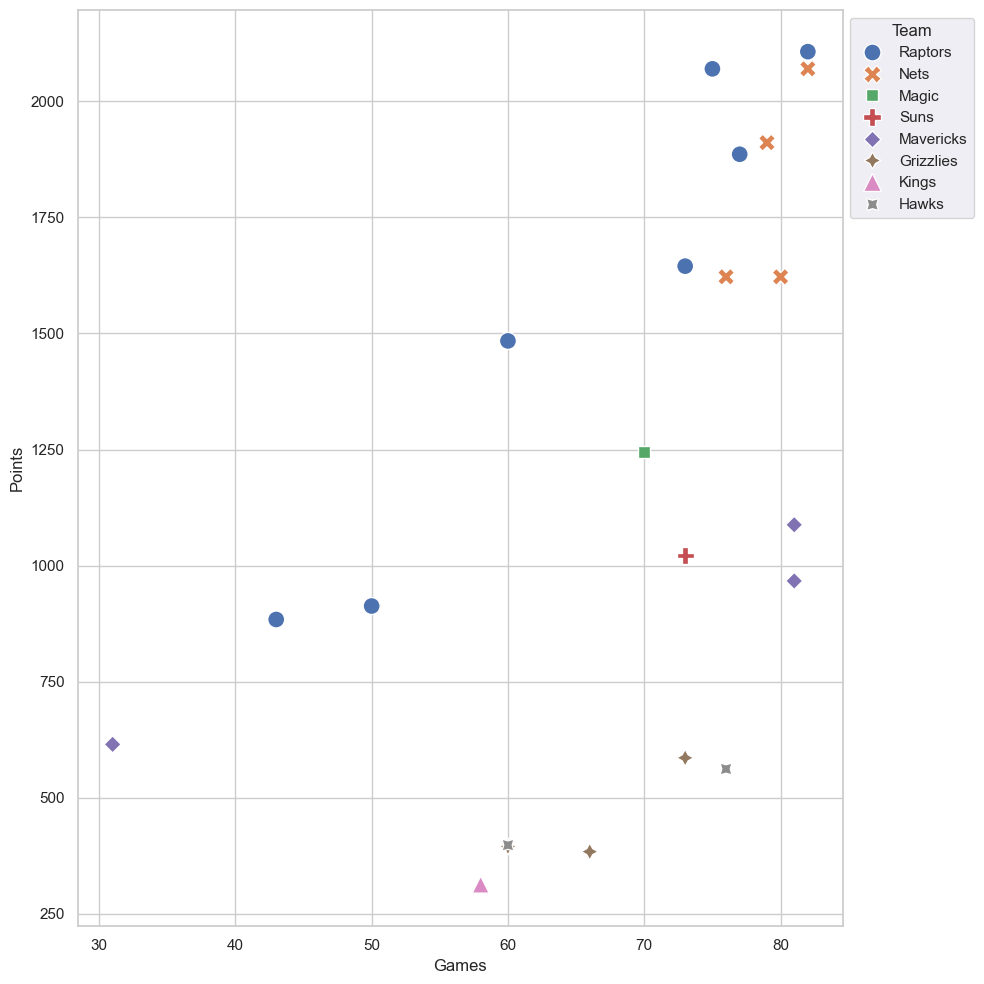

In [414]:
# Defining figure size
plt.subplots(figsize=(10,10))

# Setting the figure's theme
sns.set_theme(style="darkgrid")

# Defining the Scatterplot's elements
sns.scatterplot(data=vinceCarter,
                x="Games", y="Points",
                hue="Team", style="Team",
                s=150
                )

# Defining the title and position of the legend
plt.legend(title="Team", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [366]:
# Framing the Dataset
vCarter_df = pd.DataFrame(vinceCarter)

# Calculating total points per team
vCarter_df_grouped = vCarter_df.groupby("Team")["Points"].sum()
sorted_vCarter_df_grouped = vCarter_df_grouped.sort_values(ascending=False)

sorted_vCarter_df_grouped

Team
Raptors      10989
Nets          7225
Mavericks     2670
Grizzlies     1365
Magic         1244
Suns          1022
Hawks          960
Kings          313
Name: Points, dtype: int64

C:\Users\Ataberk\AppData\Local\Temp\ipykernel_15760\2555887745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_vCarter_df_grouped.values, y=sorted_vCarter_df_grouped.index, palette="tab20")


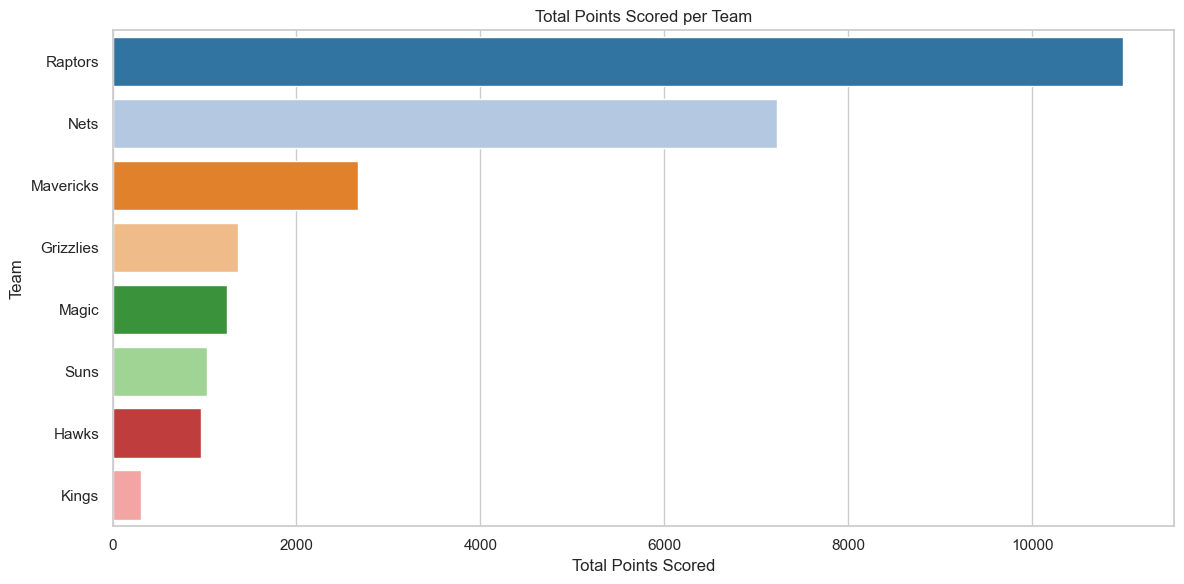

In [413]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_vCarter_df_grouped.values, y=sorted_vCarter_df_grouped.index, palette="tab20")
plt.title("Total Points Scored per Team")
plt.xlabel("Total Points Scored")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

In [358]:
# Framing the Dataset
vinceC_df = pd.DataFrame(vinceCarter)

# Calculate average points per game for each year by team
vinceC_df["Average Points per Game"] = vinceC_df["Points"] / vinceC_df["Games"]

# Structure Dataframe to show year and teams sorted using groupby
def df(s):
    return s.iloc[0]

sorted_df = vinceC_df.groupby(["Year", "Team"]).agg(df)
sorted_df

,,Games,Points,Average Points per Game
Year,Team,,,
1998,Raptors,50,913,18.260000
1999,Raptors,82,2107,25.695122
2000,Raptors,75,2070,27.600000
2001,Raptors,60,1484,24.733333
2002,Raptors,43,884,20.558140
2003,Raptors,73,1645,22.534247
2004,Raptors,77,1886,24.493506
2005,Nets,79,1911,24.189873
2006,Nets,82,2070,25.243902


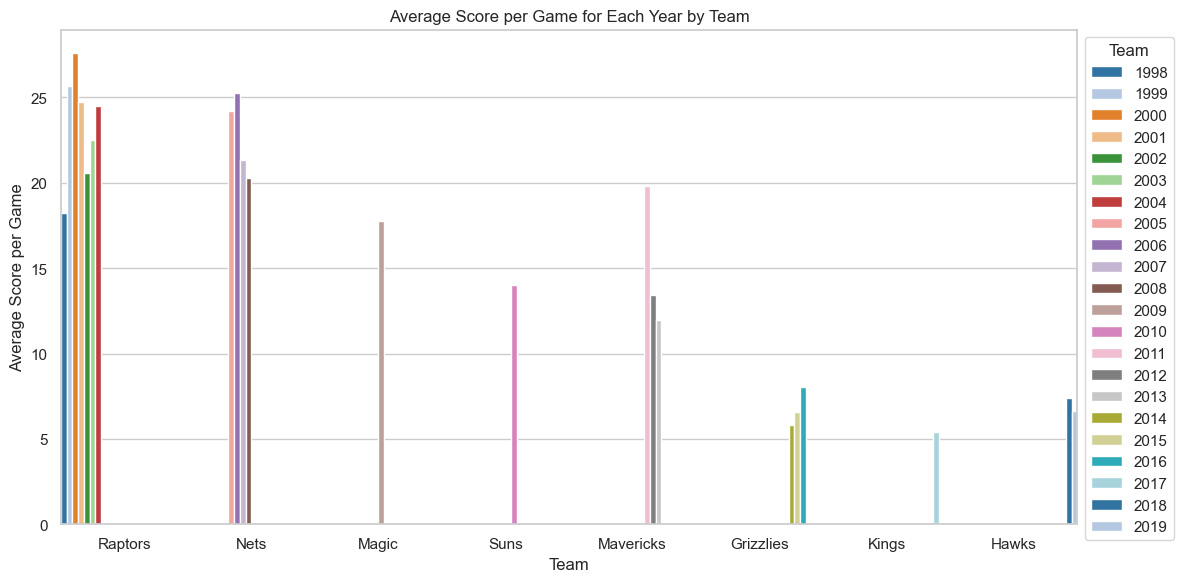

In [412]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.barplot(data=sorted_df,
            x="Team", y="Average Points per Game", hue="Year", 
            palette="tab20", width=1)
plt.title("Average Score per Game for Each Year by Team")
plt.xlabel("Team")
plt.ylabel("Average Score per Game")
plt.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [353]:
# Framing the Dataset
VinceC_df = pd.DataFrame(vinceCarter)

# Calculate average points per game for each year by team
VinceC_df["Average Points per Game"] = VinceC_df["Points"] / VinceC_df["Games"]

# Structure Dataframe to show best avg points using groupby
def best(s):
    return s.iloc[0]

sorted_df = VinceC_df.sort_values("Average Points per Game", ascending=False).groupby(["Team"]).agg(best)
final_df = sorted_df.sort_values("Year")

final_df

,Year,Games,Points,Average Points per Game
Team,,,,
Raptors,2000,75,2070,27.600000
Nets,2006,82,2070,25.243902
Magic,2009,70,1244,17.771429
Suns,2010,73,1022,14.000000
Mavericks,2011,31,615,19.838710
Grizzlies,2016,73,586,8.027397
Kings,2017,58,313,5.396552
Hawks,2018,76,562,7.394737


In [392]:
# Calculating average of the average points per Team
avg_of_avg_df = VinceC_df.groupby("Team")["Average Points per Game"].mean()
sorted_avg_of_avg_df = avg_of_avg_df.sort_values(ascending=False)

sorted_avg_of_avg_df

Team
Raptors      23.410621
Nets         22.762720
Magic        17.771429
Mavericks    15.069693
Suns         14.000000
Hawks         7.014035
Grizzlies     6.809637
Kings         5.396552
Name: Average Points per Game, dtype: float64

In [395]:
# Calculating total games played per Team
total_games = VinceC_df.groupby("Team")["Games"].sum()
sorted_total_games = total_games.sort_values(ascending=False)

sorted_total_games

Team
Raptors      460
Nets         317
Grizzlies    199
Mavericks    193
Hawks        136
Suns          73
Magic         70
Kings         58
Name: Games, dtype: int64

<Figure size 1500x800 with 0 Axes>

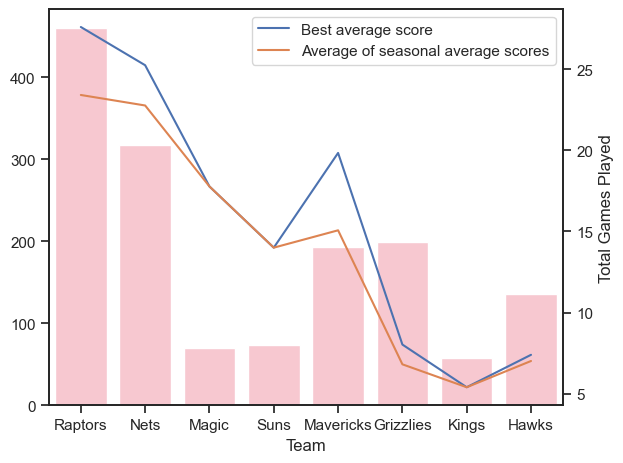

In [422]:
# Plotting the line chart
plt.figure(figsize=(15, 8))
sns.set_theme(style="ticks")
fig, ax = plt.subplots()
ax2 = ax.twinx()

sns.lineplot(data=final_df, x="Team", y="Average Points per Game", ax=ax2, label="Best average score")
sns.lineplot(x=sorted_avg_of_avg_df.index, y=sorted_avg_of_avg_df.values, ax=ax2, label="Average of seasonal average scores")
sns.barplot(x=sorted_total_games.index, y=sorted_total_games.values, ax=ax, color="pink")

ax2.set_ylabel("Total Games Played")
plt.tight_layout()
plt.show()